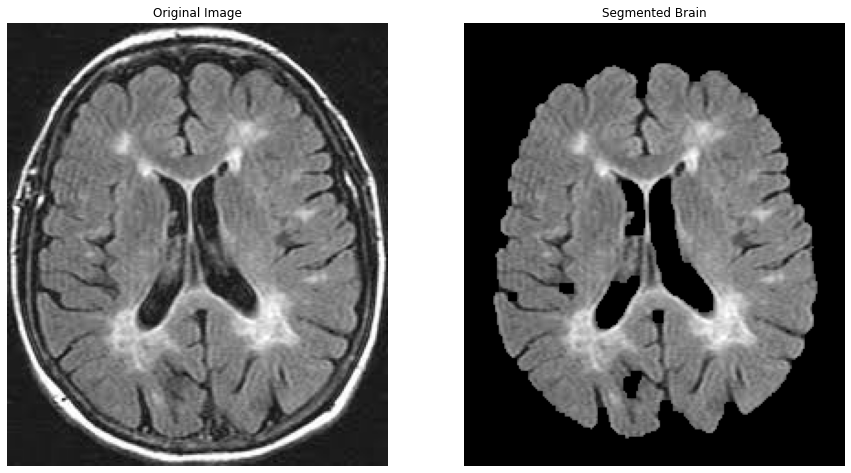

In [36]:
#skull stripping
import numpy as np
import cv2
from matplotlib import pyplot as plt

def ShowImages(titles, images, ctypes):
    fig, axs = plt.subplots(1, len(titles), figsize=(15, 10))
    for i in range(len(titles)):
        if ctypes[i] == 'bgr':
            b, g, r = cv2.split(images[i])
            rgb_img = cv2.merge([r, g, b])
            axs[i].imshow(rgb_img)
        elif ctypes[i] == 'hsv':
            rgb = cv2.cvtColor(images[i], cv2.COLOR_HSV2RGB)
            axs[i].imshow(rgb)
        elif ctypes[i] == 'gray':
            axs[i].imshow(images[i], cmap='gray')
        elif ctypes[i] == 'rgb':
            axs[i].imshow(images[i])
        else:
            raise Exception("Unknown colour type")
        axs[i].axis('off')
        axs[i].set_title(titles[i])
    plt.show()

# Read in image
file_path=r"E:\Images\23 no.jpg"

# Make sure the file exists before reading it
if not cv2.haveImageReader(file_path):
    raise FileNotFoundError("The image file could not be found.")

# Read the image
img = cv2.imread(file_path)

# Check if the image was read successfully
# if img is None:
#     raise IOError("Error reading the image file")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

# Use connected components to extract the largest connected component (brain)
num_labels, markers, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Get the area taken by each component. Ignore label 0 since this is the background.
areas = stats[1:, cv2.CC_STAT_AREA]

# Get the label of the largest component by area
largest_component_label = np.argmax(areas) + 1

# Get pixels which correspond to the brain
brain_mask = (markers == largest_component_label).astype(np.uint8) * 255

# Apply a morphological operation to improve the brain mask (optional)
kernel = np.ones((5, 5), np.uint8)
brain_mask = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)

# Apply the brain mask to the original image
brain_out = cv2.bitwise_and(img, img, mask=brain_mask)

# Show the original image and the segmented brain image side by side
ShowImages(['Original Image', 'Segmented Brain'], [img, brain_out], ['bgr', 'bgr'])


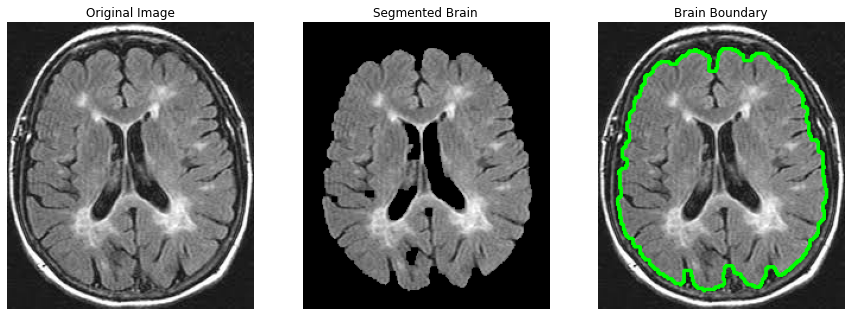

In [41]:
#skull striping with boundary 
import numpy as np
import cv2
from matplotlib import pyplot as plt

def ShowImages(titles, images, ctypes):
    fig, axs = plt.subplots(1, len(titles), figsize=(15, 10))
    for i in range(len(titles)):
        if ctypes[i] == 'bgr':
            b, g, r = cv2.split(images[i])
            rgb_img = cv2.merge([r, g, b])
            axs[i].imshow(rgb_img)
        elif ctypes[i] == 'hsv':
            rgb = cv2.cvtColor(images[i], cv2.COLOR_HSV2RGB)
            axs[i].imshow(rgb)
        elif ctypes[i] == 'gray':
            axs[i].imshow(images[i], cmap='gray')
        elif ctypes[i] == 'rgb':
            axs[i].imshow(images[i])
        else:
            raise Exception("Unknown colour type")
        axs[i].axis('off')
        axs[i].set_title(titles[i])
    plt.show()

# Read in image
file_path = r"E:\Images\23 no.jpg"

# Make sure the file exists before reading it
if not cv2.haveImageReader(file_path):
    raise FileNotFoundError("The image file could not be found.")

# Read the image
img = cv2.imread(file_path)

# Check if the image was read successfully
# if img is None:
#     raise IOError("Error reading the image file")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

# Use connected components to extract the largest connected component (brain)
num_labels, markers, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Get the area taken by each component. Ignore label 0 since this is the background.
areas = stats[1:, cv2.CC_STAT_AREA]

# Get the label of the largest component by area
largest_component_label = np.argmax(areas) + 1

# Get pixels which correspond to the brain
brain_mask = (markers == largest_component_label).astype(np.uint8) * 255

# Apply a morphological operation to improve the brain mask (optional)
kernel = np.ones((5, 5), np.uint8)
brain_mask = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)

# Apply the brain mask to the original image
brain_out = cv2.bitwise_and(img, img, mask=brain_mask)

# Find contours in the brain mask
contours, _ = cv2.findContours(brain_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
contour_image = img.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green color, line thickness 2

# Show the original image, the segmented brain image, and the boundary image side by side
ShowImages(['Original Image', 'Segmented Brain', 'Brain Boundary'],
           [img, brain_out, contour_image],
           ['bgr', 'bgr', 'bgr'])


Contour 1 Boundary Points: [(105, 22), (103, 24), (102, 24), (102, 26), (101, 27), (101, 31), (100, 32), (100, 38), (99, 39), (99, 40), (98, 41), (94, 41), (93, 40), (93, 33), (94, 32), (94, 31), (93, 30), (93, 29), (92, 28), (91, 28), (90, 27), (89, 27), (87, 25), (85, 25), (84, 24), (83, 24), (82, 23), (81, 23), (80, 24), (77, 24), (73, 28), (71, 28), (68, 31), (67, 31), (67, 32), (66, 33), (66, 34), (65, 35), (61, 35), (59, 33), (53, 33), (52, 34), (51, 34), (46, 39), (46, 41), (43, 44), (41, 44), (39, 46), (39, 51), (36, 54), (36, 57), (35, 58), (35, 61), (33, 63), (32, 63), (31, 64), (31, 66), (30, 67), (30, 73), (26, 77), (26, 83), (24, 85), (24, 91), (25, 91), (26, 92), (26, 99), (25, 100), (24, 100), (24, 101), (23, 102), (23, 104), (20, 107), (20, 113), (22, 115), (23, 115), (24, 116), (24, 120), (23, 121), (23, 122), (22, 123), (19, 123), (19, 124), (17, 126), (17, 127), (18, 128), (18, 139), (19, 140), (19, 146), (18, 147), (17, 147), (17, 148), (16, 149), (16, 153), (17, 15

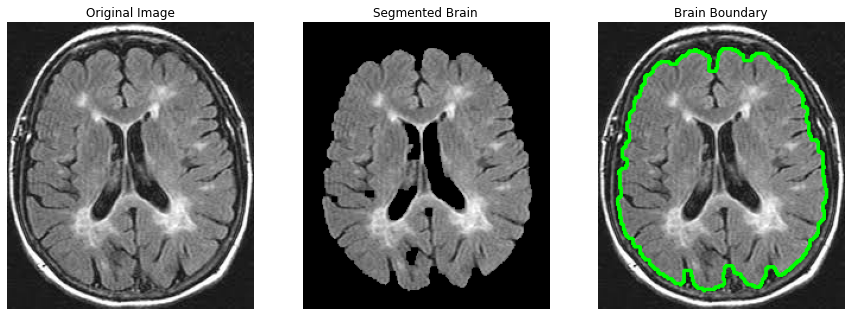

In [20]:
#skull striping with boundary values
import numpy as np
import cv2
from matplotlib import pyplot as plt

def ShowImages(titles, images, ctypes):
    fig, axs = plt.subplots(1, len(titles), figsize=(15, 10))
    for i in range(len(titles)):
        if ctypes[i] == 'bgr':
            b, g, r = cv2.split(images[i])
            rgb_img = cv2.merge([r, g, b])
            axs[i].imshow(rgb_img)
        elif ctypes[i] == 'hsv':
            rgb = cv2.cvtColor(images[i], cv2.COLOR_HSV2RGB)
            axs[i].imshow(rgb)
        elif ctypes[i] == 'gray':
            axs[i].imshow(images[i], cmap='gray')
        elif ctypes[i] == 'rgb':
            axs[i].imshow(images[i])
        else:
            raise Exception("Unknown colour type")
        axs[i].axis('off')
        axs[i].set_title(titles[i])
    plt.show()

def get_boundary_points(contour):
    boundary_points = []
    for point in contour:
        x, y = point[0]
        boundary_points.append((x, y))
    return boundary_points

# Read in image
file_path = r"E:\Images\23 no.jpg"

# Make sure the file exists before reading it
if not cv2.haveImageReader(file_path):
    raise FileNotFoundError("The image file could not be found.")

# Read the image
img = cv2.imread(file_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

# Use connected components to extract the largest connected component (brain)
num_labels, markers, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Get the area taken by each component. Ignore label 0 since this is the background.
areas = stats[1:, cv2.CC_STAT_AREA]

# Get the label of the largest component by area
largest_component_label = np.argmax(areas) + 1

# Get pixels which correspond to the brain
brain_mask = (markers == largest_component_label).astype(np.uint8) * 255

# Apply a morphological operation to improve the brain mask (optional)
kernel = np.ones((5, 5), np.uint8)
brain_mask = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)

# Apply the brain mask to the original image
brain_out = cv2.bitwise_and(img, img, mask=brain_mask)

# Find contours in the brain mask
contours, _ = cv2.findContours(brain_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
contour_image = img.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green color, line thickness 2



    
# Extract and show the boundary points
for i, contour in enumerate(contours):
    boundary_points = get_boundary_points(contour)
    print(f"Contour {i+1} Boundary Points: {boundary_points}")
    print(" ") 
    
    # Get the pixel values of the boundary points
    boundary_values = [gray[y, x] for x, y in boundary_points]
    print(f"Contour {i+1} Boundary Pixel Values: {boundary_values}")

    # Optionally, draw the boundary points on the contour image (uncomment the following lines)
    # for x, y in boundary_points:
    #     cv2.circle(contour_image, (x, y), 2, (255, 0, 0), -1)  # Blue color, circle radius 2

# Show the original image, the segmented brain image, and the boundary image side by side
ShowImages(['Original Image', 'Segmented Brain', 'Brain Boundary'],
           [img, brain_out, contour_image],
           ['bgr', 'bgr', 'bgr'])



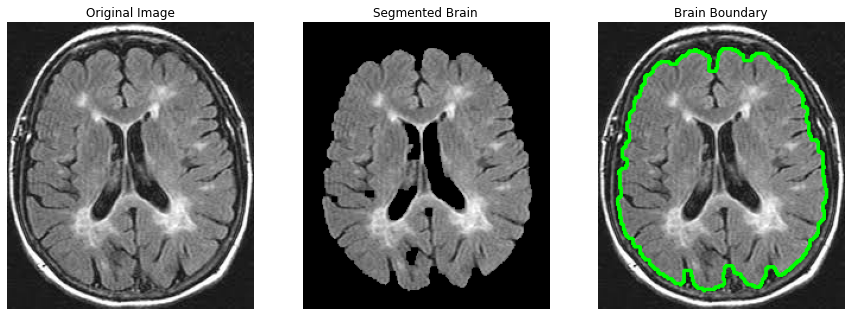

Contour 1 Boundary Points: [(105, 22), (103, 24), (102, 24), (102, 26), (101, 27), (101, 31), (100, 32), (100, 38), (99, 39), (99, 40), (98, 41), (94, 41), (93, 40), (93, 33), (94, 32), (94, 31), (93, 30), (93, 29), (92, 28), (91, 28), (90, 27), (89, 27), (87, 25), (85, 25), (84, 24), (83, 24), (82, 23), (81, 23), (80, 24), (77, 24), (73, 28), (71, 28), (68, 31), (67, 31), (67, 32), (66, 33), (66, 34), (65, 35), (61, 35), (59, 33), (53, 33), (52, 34), (51, 34), (46, 39), (46, 41), (43, 44), (41, 44), (39, 46), (39, 51), (36, 54), (36, 57), (35, 58), (35, 61), (33, 63), (32, 63), (31, 64), (31, 66), (30, 67), (30, 73), (26, 77), (26, 83), (24, 85), (24, 91), (25, 91), (26, 92), (26, 99), (25, 100), (24, 100), (24, 101), (23, 102), (23, 104), (20, 107), (20, 113), (22, 115), (23, 115), (24, 116), (24, 120), (23, 121), (23, 122), (22, 123), (19, 123), (19, 124), (17, 126), (17, 127), (18, 128), (18, 139), (19, 140), (19, 146), (18, 147), (17, 147), (17, 148), (16, 149), (16, 153), (17, 15

In [1]:
#skull striping with boundary values using feature extraction
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


def ShowImages(titles, images, ctypes):
    fig, axs = plt.subplots(1, len(titles), figsize=(15, 10))
    for i in range(len(titles)):
        if ctypes[i] == 'bgr':
            b, g, r = cv2.split(images[i])
            rgb_img = cv2.merge([r, g, b])
            axs[i].imshow(rgb_img)
        elif ctypes[i] == 'hsv':
            rgb = cv2.cvtColor(images[i], cv2.COLOR_HSV2RGB)
            axs[i].imshow(rgb)
        elif ctypes[i] == 'gray':
            axs[i].imshow(images[i], cmap='gray')
        elif ctypes[i] == 'rgb':
            axs[i].imshow(images[i])
        else:
            raise Exception("Unknown colour type")
        axs[i].axis('off')
        axs[i].set_title(titles[i])
    plt.show()

def get_boundary_points(contour):
    boundary_points = []
    for point in contour:
        x, y = point[0]
        boundary_points.append((x, y))
    return boundary_points

# Read in image
file_path = r"E:\Images\23 no.jpg"

# Make sure the file exists before reading it
if not cv2.haveImageReader(file_path):
    raise FileNotFoundError("The image file could not be found.")

# Read the image
img = cv2.imread(file_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

# Use connected components to extract the largest connected component (brain)
num_labels, markers, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Get the area taken by each component. Ignore label 0 since this is the background.
areas = stats[1:, cv2.CC_STAT_AREA]

# Get the label of the largest component by area
largest_component_label = np.argmax(areas) + 1

# Get pixels which correspond to the brain
brain_mask = (markers == largest_component_label).astype(np.uint8) * 255

# Apply a morphological operation to improve the brain mask (optional)
kernel = np.ones((5, 5), np.uint8)
brain_mask = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)

# Apply the brain mask to the original image
brain_out = cv2.bitwise_and(img, img, mask=brain_mask)

# Find contours in the brain mask
contours, _ = cv2.findContours(brain_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
contour_image = img.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green color, line thickness 2

# Show the original image, the segmented brain image, and the boundary image side by side
ShowImages(['Original Image', 'Segmented Brain', 'Brain Boundary'],
           [img, brain_out, contour_image],
           ['bgr', 'bgr', 'bgr'])

# Feature extraction using VGG16
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
boundary_images = []

# Extract and show the boundary points
for i, contour in enumerate(contours):
    boundary_points = get_boundary_points(contour)
    print(f"Contour {i+1} Boundary Points: {boundary_points}")

    # Extract the region of interest (ROI) from the original image based on the boundary points
    x, y, w, h = cv2.boundingRect(contour)
    roi = img[y:y+h, x:x+w]

    # Resize the ROI to fit the input size of VGG16 (224x224)
    roi = cv2.resize(roi, (224, 224))

    # Preprocess the ROI for VGG16 model
    roi = preprocess_input(roi)

    # Expand the dimensions to match the input shape of the VGG16 model
    roi = np.expand_dims(roi, axis=0)

    # Get the features for the ROI using VGG16
    features = model.predict(roi)

    # Append the features to a list
    boundary_images.append(features)

# boundary_images contains the extracted features from each contour/ROI
# You can use these features for further processing or analysis.

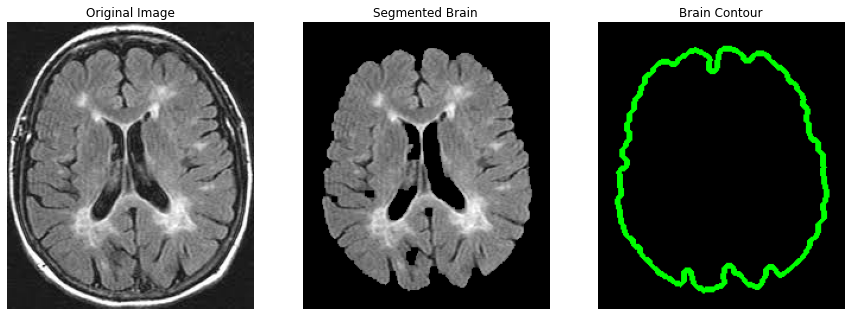

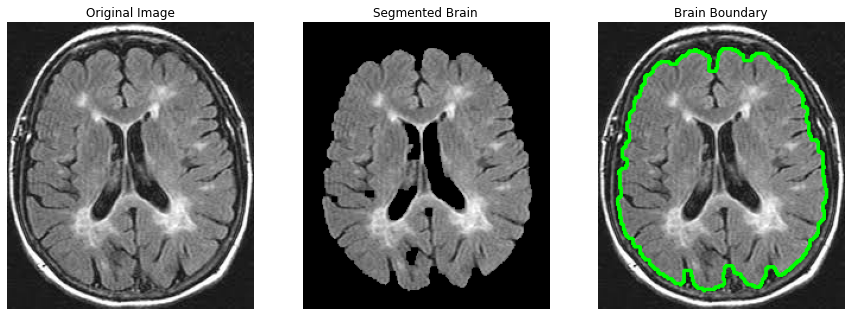

Contour 1 Boundary Points: [(105, 22), (103, 24), (102, 24), (102, 26), (101, 27), (101, 31), (100, 32), (100, 38), (99, 39), (99, 40), (98, 41), (94, 41), (93, 40), (93, 33), (94, 32), (94, 31), (93, 30), (93, 29), (92, 28), (91, 28), (90, 27), (89, 27), (87, 25), (85, 25), (84, 24), (83, 24), (82, 23), (81, 23), (80, 24), (77, 24), (73, 28), (71, 28), (68, 31), (67, 31), (67, 32), (66, 33), (66, 34), (65, 35), (61, 35), (59, 33), (53, 33), (52, 34), (51, 34), (46, 39), (46, 41), (43, 44), (41, 44), (39, 46), (39, 51), (36, 54), (36, 57), (35, 58), (35, 61), (33, 63), (32, 63), (31, 64), (31, 66), (30, 67), (30, 73), (26, 77), (26, 83), (24, 85), (24, 91), (25, 91), (26, 92), (26, 99), (25, 100), (24, 100), (24, 101), (23, 102), (23, 104), (20, 107), (20, 113), (22, 115), (23, 115), (24, 116), (24, 120), (23, 121), (23, 122), (22, 123), (19, 123), (19, 124), (17, 126), (17, 127), (18, 128), (18, 139), (19, 140), (19, 146), (18, 147), (17, 147), (17, 148), (16, 149), (16, 153), (17, 15

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


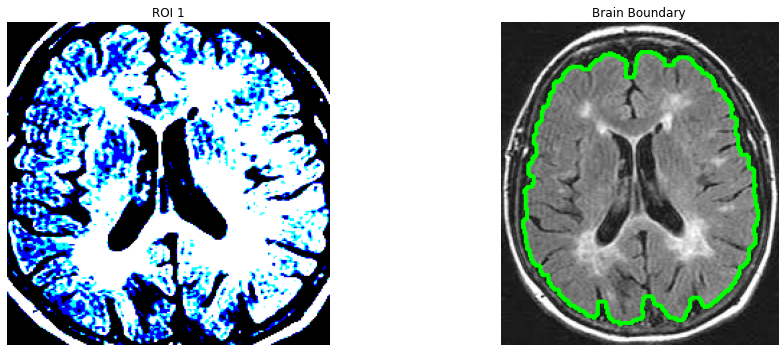

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


def ShowImages(titles, images, ctypes):
    fig, axs = plt.subplots(1, len(titles), figsize=(15, 10))
    for i in range(len(titles)):
        if ctypes[i] == 'bgr':
            b, g, r = cv2.split(images[i])
            rgb_img = cv2.merge([r, g, b])
            axs[i].imshow(rgb_img)
        elif ctypes[i] == 'hsv':
            rgb = cv2.cvtColor(images[i], cv2.COLOR_HSV2RGB)
            axs[i].imshow(rgb)
        elif ctypes[i] == 'gray':
            axs[i].imshow(images[i], cmap='gray')
        elif ctypes[i] == 'rgb':
            axs[i].imshow(images[i])
        else:
            raise Exception("Unknown colour type")
        axs[i].axis('off')
        axs[i].set_title(titles[i])
    plt.show()

def get_boundary_points(contour):
    boundary_points = []
    for point in contour:
        x, y = point[0]
        boundary_points.append((x, y))
    return boundary_points

# Read in image
file_path = r"E:\Images\23 no.jpg"

# Make sure the file exists before reading it
if not cv2.haveImageReader(file_path):
    raise FileNotFoundError("The image file could not be found.")

# Read the image
img = cv2.imread(file_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

# Use connected components to extract the largest connected component (brain)
num_labels, markers, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Get the area taken by each component. Ignore label 0 since this is the background.
areas = stats[1:, cv2.CC_STAT_AREA]

# Get the label of the largest component by area
largest_component_label = np.argmax(areas) + 1

# Get pixels which correspond to the brain
brain_mask = (markers == largest_component_label).astype(np.uint8) * 255

# Apply a morphological operation to improve the brain mask (optional)
kernel = np.ones((5, 5), np.uint8)
brain_mask = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)

# Apply the brain mask to the original image
brain_out = cv2.bitwise_and(img, img, mask=brain_mask)

# Find contours in the brain mask
contours, _ = cv2.findContours(brain_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
contour_image = img.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green color, line thickness 2

# Show the original image, the segmented brain image, and the boundary image side by side
ShowImages(['Original Image', 'Segmented Brain', 'Brain Boundary'],
           [img, brain_out, contour_image],
           ['bgr', 'bgr', 'bgr'])


# Feature extraction using VGG16
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
boundary_images = []

# Extract and show the boundary points
plt.figure(figsize=(15, 5))

for i, contour in enumerate(contours):
    boundary_points = get_boundary_points(contour)
    print(f"Contour {i+1} Boundary Points: {boundary_points}")

    # Extract the region of interest (ROI) from the original image based on the boundary points
    x, y, w, h = cv2.boundingRect(contour)
    roi = img[y:y+h, x:x+w]

    # Resize the ROI to fit the input size of VGG16 (224x224)
    roi = cv2.resize(roi, (224, 224))

    # Preprocess the ROI for VGG16 model
    roi = preprocess_input(roi)

    # Expand the dimensions to match the input shape of the VGG16 model
    roi = np.expand_dims(roi, axis=0)

    # Get the features for the ROI using VGG16
    features = model.predict(roi)

    # Append the features to a list
    boundary_images.append(roi)  # Append the ROI instead of features for visualization

    # Display the extracted ROI
    plt.subplot(1, len(contours)+1, i + 1)
    plt.imshow(cv2.cvtColor(roi[0], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"ROI {i+1}")

# Show the original image, the segmented brain image, and the boundary image
plt.subplot(1, len(contours)+1, len(contours) + 1)
plt.imshow(contour_image[..., ::-1])
plt.axis('off')
plt.title('Brain Boundary')

plt.tight_layout()
plt.show()


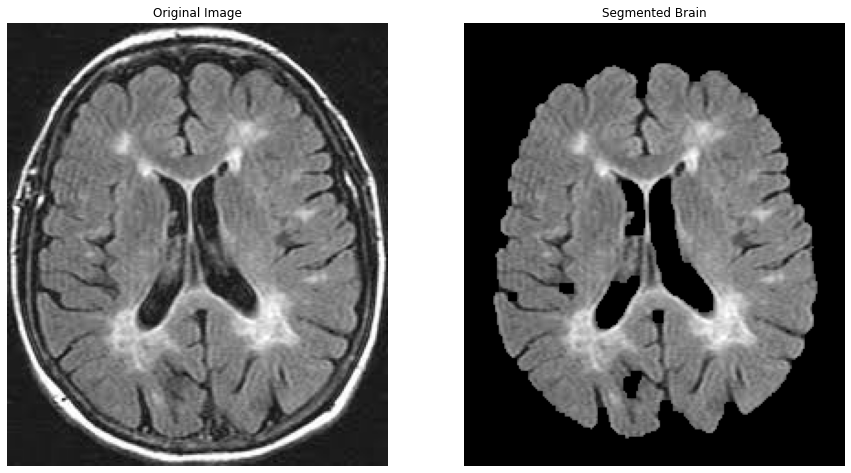

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

def ShowImages(titles, images, ctypes):
    fig, axs = plt.subplots(1, len(titles), figsize=(15, 10))
    for i in range(len(titles)):
        if ctypes[i] == 'bgr':
            b, g, r = cv2.split(images[i])
            rgb_img = cv2.merge([r, g, b])
            axs[i].imshow(rgb_img)
        elif ctypes[i] == 'hsv':
            rgb = cv2.cvtColor(images[i], cv2.COLOR_HSV2RGB)
            axs[i].imshow(rgb)
        elif ctypes[i] == 'gray':
            axs[i].imshow(images[i], cmap='gray')
        elif ctypes[i] == 'rgb':
            axs[i].imshow(images[i])
        else:
            raise Exception("Unknown colour type")
        axs[i].axis('off')
        axs[i].set_title(titles[i])
    plt.show()

# Read in image
file_path = r"E:\Images\23 no.jpg"

# Make sure the file exists before reading it
if not cv2.haveImageReader(file_path):
    raise FileNotFoundError("The image file could not be found.")

# Read the image
img = cv2.imread(file_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

# Use connected components to extract the largest connected component (brain)
num_labels, markers, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Get the area taken by each component. Ignore label 0 since this is the background.
areas = stats[1:, cv2.CC_STAT_AREA]

# Get the label of the largest component by area
largest_component_label = np.argmax(areas) + 1

# Get pixels which correspond to the brain
brain_mask = (markers == largest_component_label).astype(np.uint8) * 255

# Apply a morphological operation to improve the brain mask (optional)
kernel = np.ones((5, 5), np.uint8)
brain_mask = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)

# Apply the brain mask to the original image
brain_out = cv2.bitwise_and(img, img, mask=brain_mask)

# Show the original image and the segmented brain image side by side
ShowImages(['Original Image', 'Segmented Brain'], [img, brain_out], ['bgr', 'bgr'])

